In [1]:
from estnltk import Text

from pandas import read_csv
from estnltk.taggers import RegexTagger

from estnltk.spans import Span, SpanList
from estnltk.layer import Layer
from estnltk.finite_grammar.layer_graph import print_nodes

In [2]:
with open("examples_.txt", "r") as fin:
    lines = fin.readlines()
lines = [line.strip() for line in lines]    

In [3]:
lines

['PSA 03042012 - 0,83ng/ml perearsti poolt .',
 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va',
 'PSA 20105,99 ja 26.01.2012 uuesti .',
 'PSA 2011 oli 0 , 4 nG7ml .',
 'PSA 201222,25ng/ml',
 'PSA 2 aastajooksuldünaamikata , eriuuring',
 ':psa 16,81! ! ! ! ! ,',
 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )',
 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a',
 'Kolesterool 1k aastas .',
 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni',
 'Kontr Verekol 08.12a Per-le juurde .',
 's vas munajuha kasvaja op , günekol 3a tagssi .',
 '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .',
 'Rütmihäire tsüklipikkus 330 msek',
 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.',
 'Põhjendus: PALAT 10 # ALAT maksanäitaja',
 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .',
 'PSA 8,5( püsib aastaid selles väärtus',
 'S , P-PSA 4.130( <4.100 µg/L )',
 'PSA 5,2.',
 'Kolesterool oli 7,9 mmol/l 0',
 'kolesterool 6.4.',
 'Kolesterool 5,2 mmol/l - esialgu dieet .',
 'SK 3900 g , S

In [4]:
vocabulary = 'regexes_fixed.csv'

In [5]:
vocabulary = read_csv(vocabulary, na_filter=False, index_col=False)

In [6]:
regex_tagger = RegexTagger(vocabulary=vocabulary[:30],
                                    attributes=['regex_type', 'value', 'grammar_symbol'],
                                    conflict_resolving_strategy='ALL',
                                    overlapped=True,
                                    layer_name='type')

In [7]:
spaces = vocabulary[30:]

In [8]:
space_tagger = RegexTagger(layer_name='space',
                           vocabulary = spaces,
                           attributes = [],
                           conflict_resolving_strategy='MAX',
                           overlapped=True
                         )

In [9]:
from estnltk.taggers.gaps_tagging.gaps_tagger import GapsTagger
gaps_tagger = GapsTagger(layer_name='random_text_layer',
                         input_layers=['space', 'type'],
                         attributes=['no_idea', 'grammar_symbol'],
                         decorator=lambda t: {'no_idea':'text', 'grammar_symbol':'RANDOM_TEXT'})

In [10]:
from estnltk.taggers.merge_tagging.merge_tagger import MergeTagger
merge_tagger = MergeTagger(layer_name='grammar_tags',
                           input_layers=['type', 'random_text_layer'],
                           attributes=('grammar_symbol', 'value', 'regex_type'))

In [11]:
text = Text("PSA 0,83ng/ml")

In [12]:
regex_tagger.tag(text)
space_tagger.tag(text)
gaps_tagger.tag(text)
merge_tagger.tag(text)

In [13]:
from estnltk.finite_grammar.trees import Rule, Grammar

In [14]:
rules = []
rules.append(Rule('QNUMBER', 'NUMBER UNIT', priority=0, group='g1'))

rules.append(Rule('QNUMBER', 'NUMBER', priority=1, group='g1'))

rules.append(Rule('QNUMBER', 'DATENUM', priority=0))

rules.append(Rule('MEASUREMENT', 'MO DATE QNUMBER', priority=0, group='g2')), 

rules.append(Rule('MEASUREMENT', 'MO QNUMBER', priority=1 , group='g2')),

rules.append(Rule('TRASH', 'RUBBISH NUMBER',priority=1, group='g3' ))
rules.append(Rule('TRASH', 'RUBBISH MO NUMBER', priority=0, group='g3'))
rules.append(Rule('TRASH', 'RUBBISH', priority=2, group='g3'))
rules.append(Rule('TRASH', 'MO DATE', priority=2))

grammar = Grammar(start_symbols=['MEASUREMENT', 'TRASH', 'QNUMBER', 'NUMBER'], rules=rules)

In [15]:
from estnltk.finite_grammar.layer_graph import layer_to_graph, plot_graph
from estnltk.finite_grammar.grammar import parse_graph
from estnltk.finite_grammar.layer_graph import graph_to_parse_trees

In [16]:
text['grammar_tags']

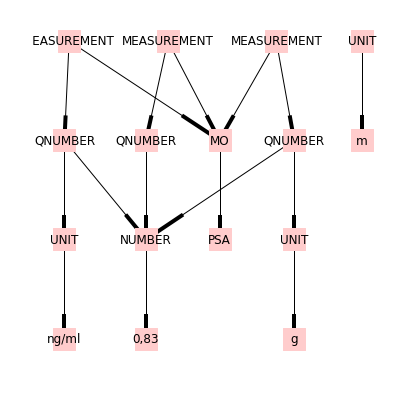

In [17]:
graph = layer_to_graph(text['grammar_tags'])
parse_graph(graph, grammar, conflict_resolving=False, debug=False)

plot_graph(graph_to_parse_trees( graph), 5)

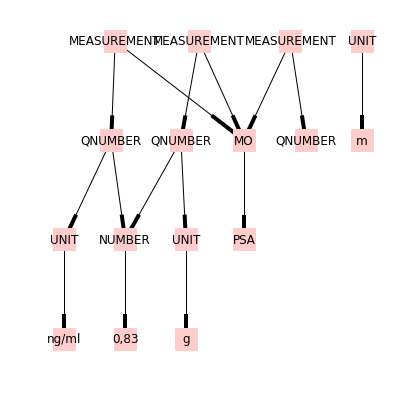

In [18]:
graph = layer_to_graph(text['grammar_tags'])
parse_graph(graph, grammar, conflict_resolving=True, debug=False)

plot_graph(graph_to_parse_trees( graph), 5)